In [118]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay

In [83]:
data = pd.read_csv("UCI_Credit_Card.csv")

In [84]:
data

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2          2         1   24      2      2     -1   
1          2   120000.0    2          2         2   26     -1      2      0   
2          3    90000.0    2          2         2   34      0      0      0   
3          4    50000.0    2          2         1   37      0      0      0   
4          5    50000.0    1          2         1   57     -1      0     -1   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29995  29996   220000.0    1          3         1   39      0      0      0   
29996  29997   150000.0    1          3         2   43     -1     -1     -1   
29997  29998    30000.0    1          2         2   37      4      3      2   
29998  29999    80000.0    1          3         1   41      1     -1      0   
29999  30000    50000.0    1          2         1   46      0      0      0   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -1  ...        0.0        0.0        0.0       0.0     689.0   
1          0  ...     3272.0     3455.0     3261.0       0.0    1000.0   
2          0  ...    14331.0    14948.0    15549.0    1518.0    1500.0   
3          0  ...    28314.0    28959.0    29547.0    2000.0    2019.0   
4          0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...    88004.0    31237.0    15980.0    8500.0   20000.0   
29996     -1  ...     8979.0     5190.0        0.0    1837.0    3526.0   
29997     -1  ...    20878.0    20582.0    19357.0       0.0       0.0   
29998      0  ...    52774.0    11855.0    48944.0   85900.0    3409.0   
29999      0  ...    36535.0    32428.0    15313.0    2078.0    1800.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0           0.0       0.0       0.0       0.0                           1  
1        1000.0    1000.0       0.0    2000.0                           1  
2        1000.0    1000.0    1000.0    5000.0                           0  
3        1200.0    1100.0    1069.0    1000.0                           0  
4       10000.0    9000.0     689.0     679.0                           0  
...         ...       ...       ...       ...                         ...  
29995    5003.0    3047.0    5000.0    1000.0                           0  
29996    8998.0     129.0       0.0       0.0                           0  
29997   22000.0    4200.0    2000.0    3100.0                           1  
29998    1178.0    1926.0   52964.0    1804.0                           1  
29999    1430.0    1000.0    1000.0    1000.0                           1  

[30000 rows x 25 columns]

In [85]:
target = "default.payment.next.month"

In [134]:
#разделяем данные

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=[target]),
                                                    data[target],
                                                   test_size=0.2, shuffle=True, random_state=42)

In [135]:
X_train

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
21753  21754    80000.0    2          2         2   24      0      0      0   
251      252    30000.0    1          2         2   28      0      0      0   
22941  22942   180000.0    2          5         1   44      0      0     -1   
618      619    60000.0    1          1         2   25      0      0      0   
17090  17091   130000.0    2          2         2   25      0      0      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29802  29803    50000.0    1          2         2   32      0      0      0   
5390    5391   200000.0    1          1         2   37      2      2      2   
860      861    50000.0    1          1         2   26     -2     -2     -2   
15795  15796    70000.0    2          2         2   25      0      0      0   
23654  23655   160000.0    2          2         1   36     -2     -2     -2   

       PAY_4  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
21753      0  ...    78321.0    73731.0    39643.0    39457.0    3503.0   
251        0  ...    29155.0    25255.0    22001.0        0.0    5006.0   
22941     -1  ...      850.0        0.0     6881.0    10340.0       0.0   
618        0  ...    38533.0    39639.0    39619.0    39140.0    2018.0   
17090      0  ...   114734.0   117823.0   120854.0   123904.0    4100.0   
...      ...  ...        ...        ...        ...        ...       ...   
29802      0  ...    55739.0    55957.0    29238.0     6119.0    2000.0   
5390       2  ...   168386.0   164182.0   169029.0   172084.0   13500.0   
860       -2  ...        0.0        0.0        0.0        0.0       0.0   
15795      0  ...    51152.0    35122.0    28633.0    28039.0    3000.0   
23654     -2  ...     3640.0     2935.0     1603.0    14129.0       0.0   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
21753    5001.0    2092.0    1218.0    1445.0     878.0  
251      1244.0     851.0     955.0       0.0       0.0  
22941     850.0       0.0    6881.0   10340.0     182.0  
618      1900.0    2000.0    1500.0    1900.0    2000.0  
17090    4200.0    5000.0    5000.0    5000.0   10700.0  
...         ...       ...       ...       ...       ...  
29802    3000.0    1591.0      72.0    1134.0   73421.0  
5390     6000.0       0.0    7500.0    6000.0    4000.0  
860         0.0       0.0       0.0       0.0       0.0  
15795    2000.0    4500.0    1200.0       0.0    1200.0  
23654    3660.0    3135.0    1650.0   14200.0    1500.0  

[24000 rows x 24 columns]

In [88]:
tree_classifier = DecisionTreeClassifier()

In [97]:
#сетка параметров

param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

In [98]:
grid_search = GridSearchCV(tree_classifier, param_grid, cv=3, n_jobs=-1, verbose=3)

In [99]:
#ищем подходящие гиперпараметры

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=3)

In [100]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [101]:
tree_classifier = grid_search.best_estimator_

In [103]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       min_samples_split=10)

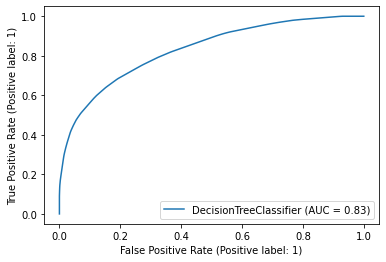

In [105]:
#метрика на трейн данных

RocCurveDisplay.from_estimator(tree_classifier, X_train, y_train) 

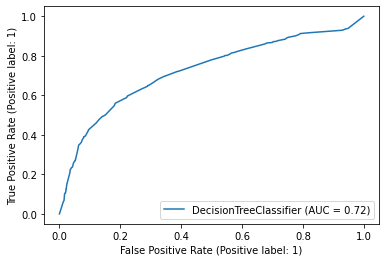

In [104]:
#метрика на тестовых данных

RocCurveDisplay.from_estimator(tree_classifier, X_test, y_test)

In [107]:
#shap values для feature importance

explainer = shap.Explainer(tree_classifier)
shap_vals = explainer.shap_values(X_test)

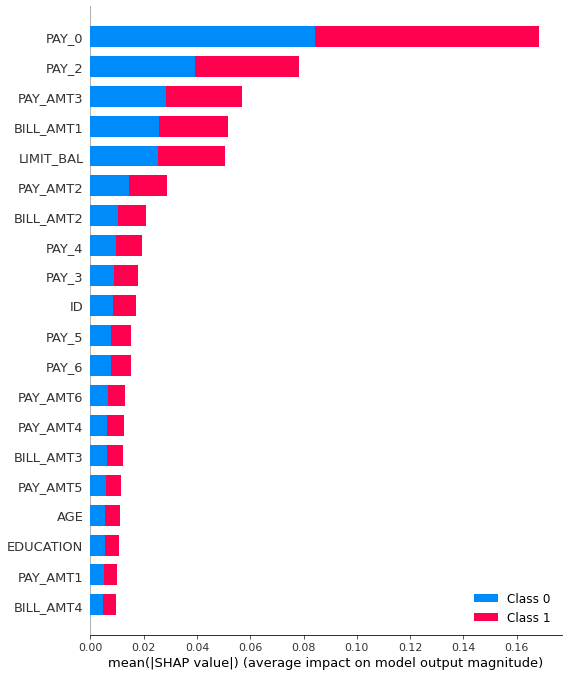

In [111]:
shap.summary_plot(shap_vals, X_test)

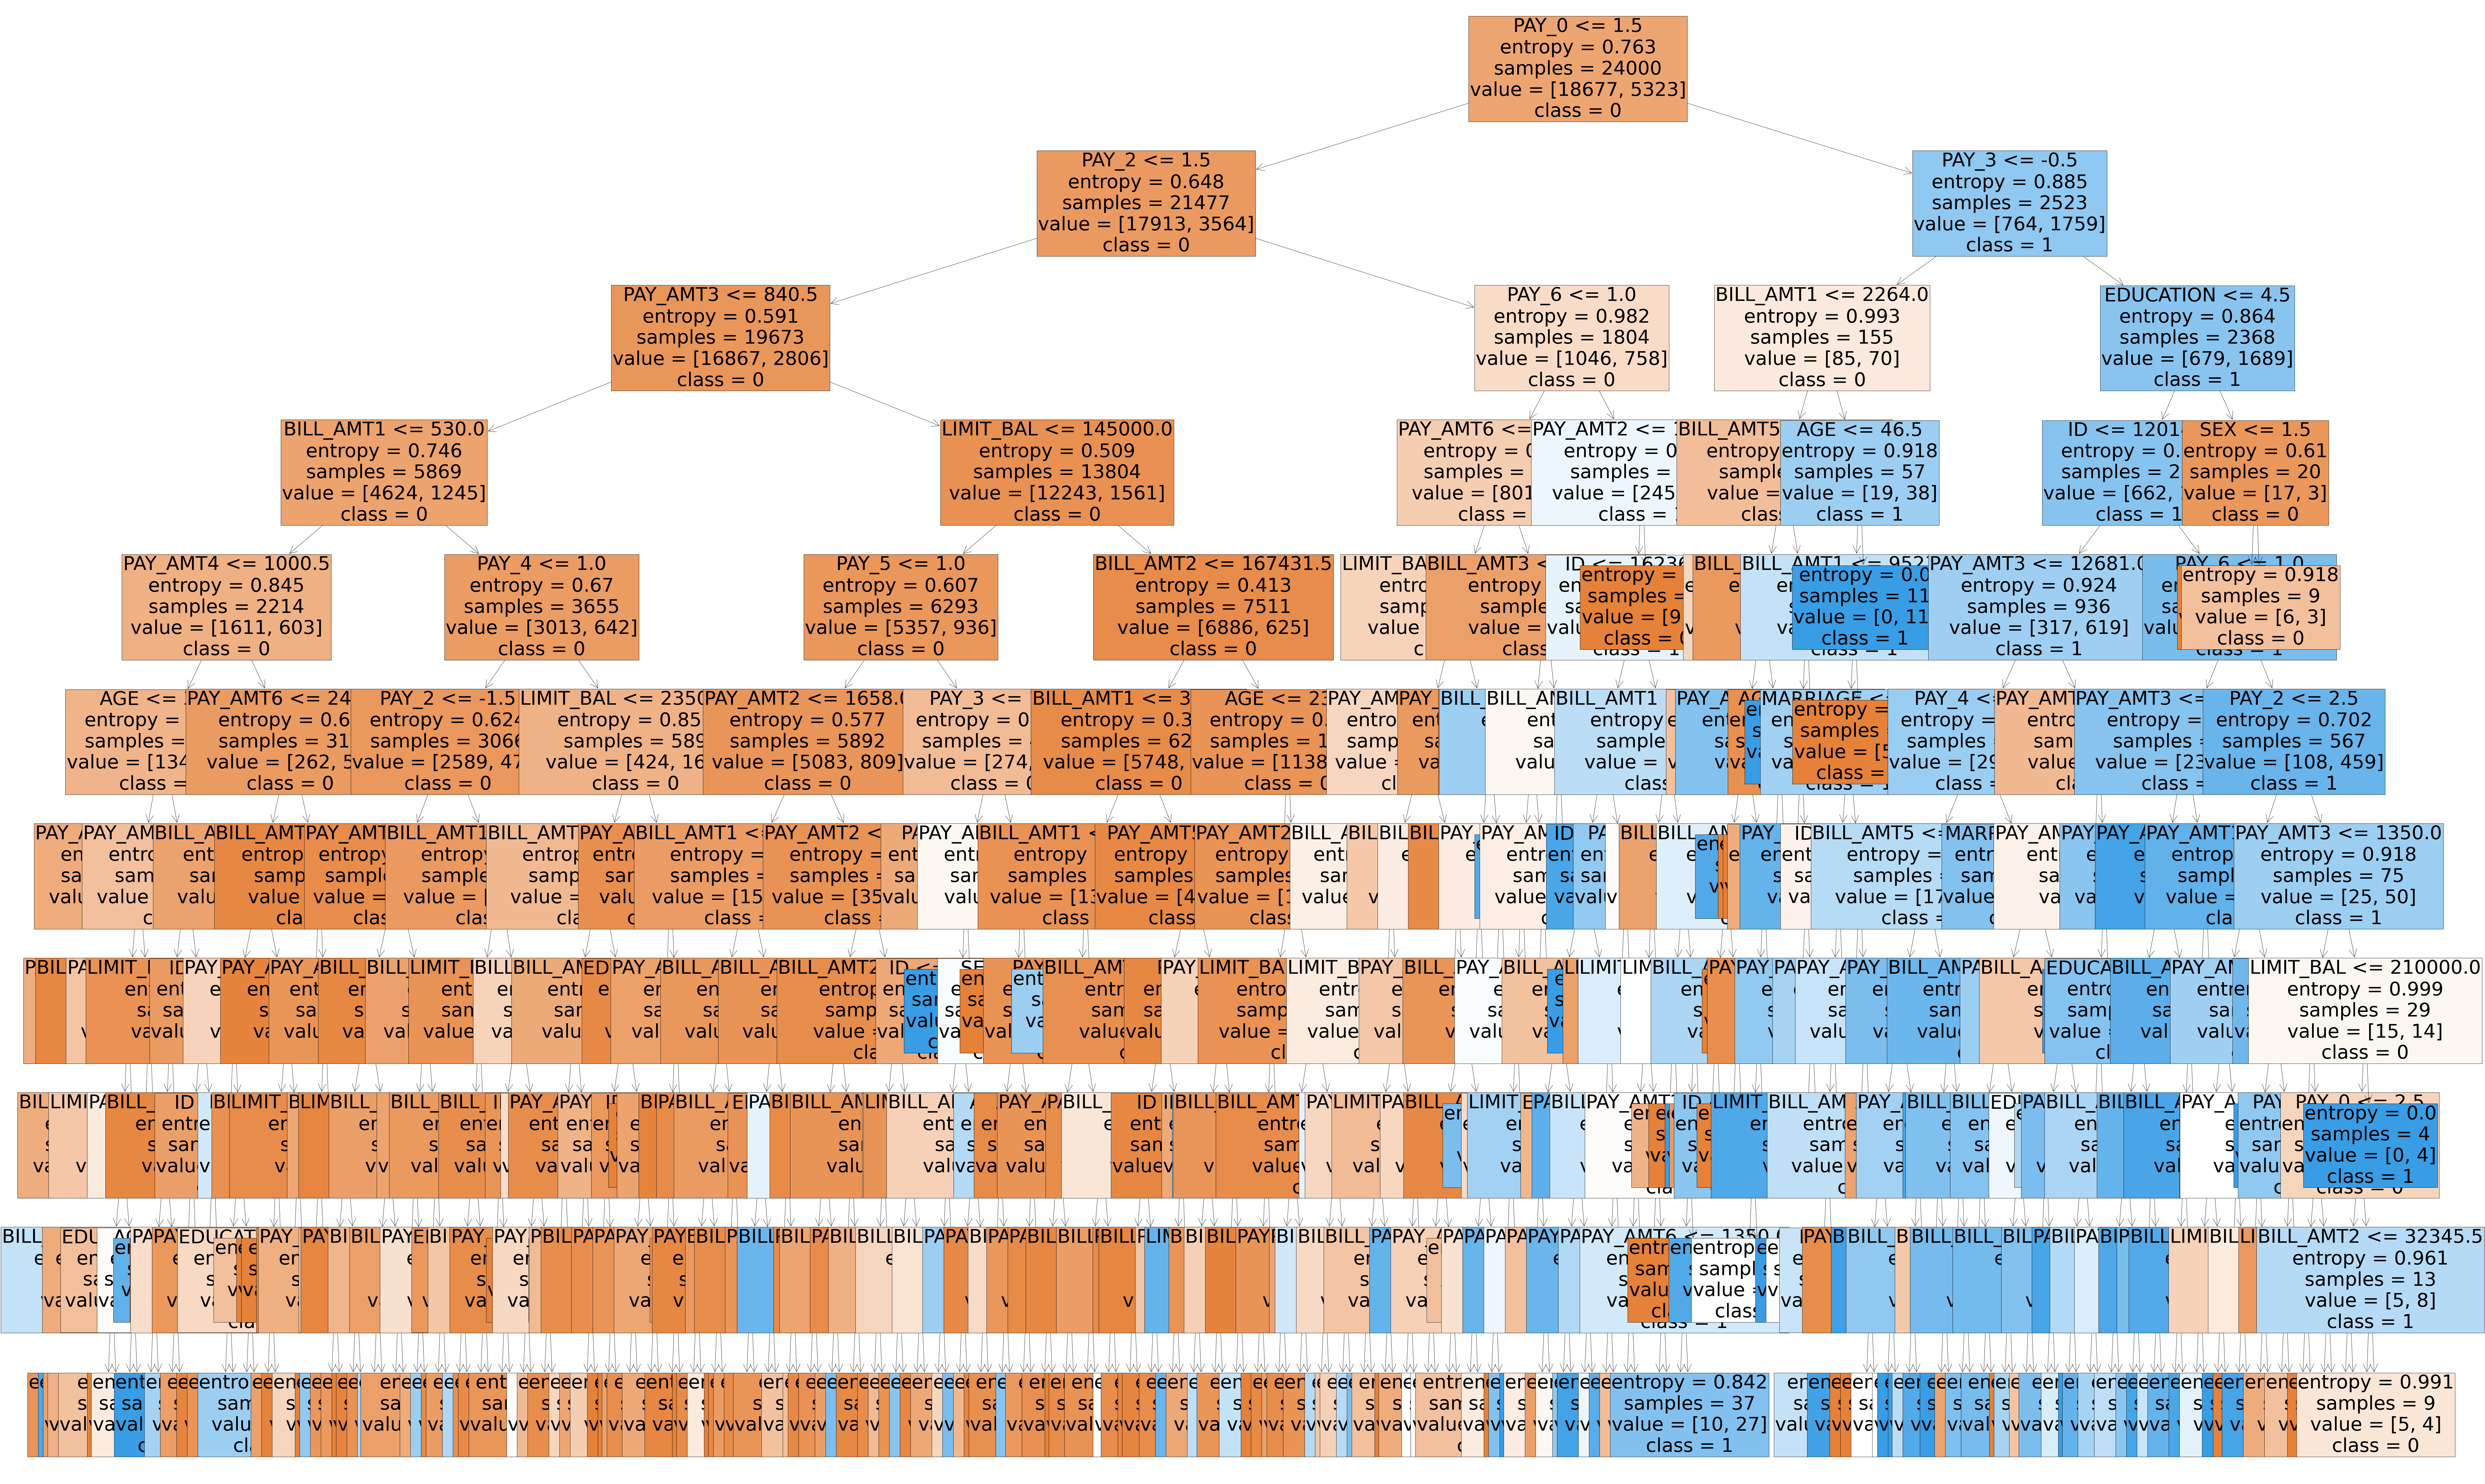

In [137]:
#визуализация данных

fig = plt.figure(figsize=(100,500))
tree_plot = tree.plot_tree(tree_classifier,
              feature_names=X_test.columns,
              class_names=['0', '1'],
              filled=True,
              proportion=False,
              fontsize=70);
fig.set_size_inches(150, 100)
#fig.savefig('tree.png')